In [14]:
import copy
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [15]:
data = pd.read_csv("data/all_data.csv")
desc_5 = joblib.load('./pickle/with_temp/best_25neue_force1.pkl')
desc_5_raw = joblib.load('./pickle/with_temp/raw_25neue_force1.pkl')
df_train = joblib.load('./pickle/train.pkl')
df_test = joblib.load('./pickle/test.pkl')

In [16]:
X_train = df_train.loc[:,desc_5].to_numpy()
X_test = df_test.loc[:,desc_5].to_numpy()
y_train = df_train.iloc[:,[-1]].to_numpy()
y_test = df_test.iloc[:,[-1]].to_numpy()
ytrain =  df_train.iloc[:,[-1]]
ytest =  df_test.iloc[:,[-1]]

scaler = MinMaxScaler()
scaler.fit(X_train)
scale_x_train = scaler.transform(X_train)
scale_x_test = scaler.transform(X_test)

param_grid={
            'C': 10,
            'gamma': 'scale',
            'epsilon':0.1
}

c = param_grid['C']
gam = param_grid['gamma']
eps = param_grid['epsilon']

model = SVR(kernel="rbf", C= c, gamma= gam, epsilon=eps)

# Plot 1

Text(0, 0.5, 'MSE')

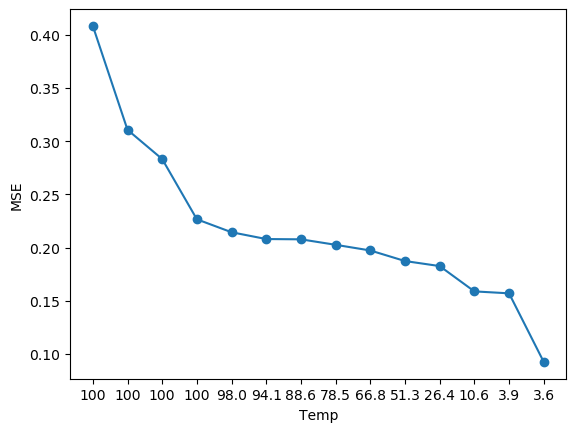

In [33]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

df = desc_5_raw.copy()
df.sort_values('MSE', inplace = True)

obj = df.iloc[0,3]
obj_format = []

for i in obj:
    if isinstance(i, float):
        dec = '%.1f' % i
        obj_format.append(dec)
    else:
        obj_format.append(i)
        
y_pos = np.arange(len(obj_format))
performance = df.iloc[0,2]

# fig = plt.figure(figsize=(10, 6))
fig = plt.figure()
# plt.bar(y_pos, performance, align='center')
plt.plot(y_pos, performance, marker='o')
plt.xticks(y_pos, obj_format)
plt.xlabel('Temp')
plt.ylabel('MSE')
# plt.title('5 Descriptors')
# plt.ylim(0.16, 0.4)
# plt.grid()
plt.savefig('./growth_mse25_neue.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()

In [77]:
### obtain 20 run

df = desc_5_raw.copy()
dfs = df.copy()
dfs.sort_values('MSE', inplace = True)
top_row = dfs.index[0:20]
top_row = top_row.to_numpy()
top_row.sort()

col=['MSE', 'solution', 'growth', 'temp']
df_real = pd.DataFrame(columns=col)

for i in range(len(top_row)):
    df_real.loc[i] = df.loc[top_row[i],:]

joblib.dump(df_real,'./pickle/with_temp/raw_25neue_real.pkl')

['./pickle/with_temp/raw_25neue_real.pkl']

# Plot 2

In [32]:
df_sort = desc_5_raw.copy()
df_sort.sort_values('MSE', inplace = True)
df_sort['MSE'].shape, len(df_sort['MSE'])

,MSE,solution,growth,temp
164,0.092586,"[66, 55, 50, 13, 98, 95, 6, 26, 28, 82, 74, 92...","[0.4083857107295426, 0.3107293627076643, 0.283...","[100, 100, 100, 100, 98.0, 94.11919999999999, ..."
0,0.100309,"[5, 31, 99, 82, 60, 50, 98, 23, 19, 52, 49, 2,...","[0.21454478321830436, 0.2103530062283245, 0.20...","[100, 96.03999999999999, 88.58423808639999, 70..."
169,0.109215,"[92, 84, 53, 25, 39, 52, 44, 59, 38, 21, 71, 1...","[0.37205466413069294, 0.36385209060522566, 0.3...","[100, 100, 100, 100, 98.0, 98.0, 88.5842380863..."
90,0.109757,"[55, 54, 57, 17, 74, 36, 81, 37, 76, 21, 58, 6...","[0.30571946573445063, 0.2913477500702373, 0.26...","[100, 100, 98.0, 96.03999999999999, 92.2368159..."
116,0.111650,"[52, 61, 55, 17, 47, 99, 93, 21, 53, 90, 10, 8...","[0.3373886112304704, 0.27652738762523305, 0.24...","[100, 100, 98.0, 96.03999999999999, 92.2368159..."
5,0.114347,"[9, 36, 23, 64, 88, 37, 83, 24, 11, 76, 8, 18,...","[0.24348791479523837, 0.20593187863164078, 0.2...","[100, 100, 86.812553324672, 85.07630225817856,..."
159,0.114729,"[16, 64, 21, 22, 65, 29, 30, 3, 45, 52, 49, 91...","[0.344232337432911, 0.2806826953958084, 0.2746...","[100, 100, 100, 98.0, 98.0, 98.0, 94.119199999..."
163,0.117840,"[71, 83, 92, 76, 54, 17, 18, 29, 52, 73, 40, 9...","[0.34256986670913264, 0.30313961953557766, 0.2...","[100, 100, 100, 100, 98.0, 98.0, 94.1191999999..."
121,0.118314,"[12, 28, 95, 76, 82, 47, 17, 34, 7, 80, 4, 6, ...","[0.33968375643070126, 0.3121643133292966, 0.28...","[100, 100, 100, 100, 98.0, 98.0, 94.1191999999..."
117,0.119760,"[12, 65, 42, 34, 50, 13, 17, 87, 97, 10, 77, 2...","[0.31561596543201753, 0.28750649174994636, 0.2...","[100, 100, 100, 100, 85.07630225817856, 78.471..."


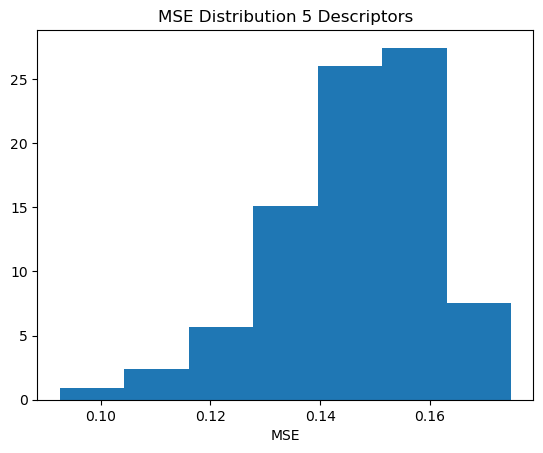

In [19]:
### Plot two 
df_sort = desc_5_raw.copy()
df_sort.sort_values('MSE', inplace = True)
# df_sort

fig = plt.figure()

plt.hist(df_sort['MSE'], density=True, bins=7)
plt.title('MSE Distribution 5 Descriptors')
plt.xlabel('MSE')
# plt.savefig('./msedist_5desc.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()

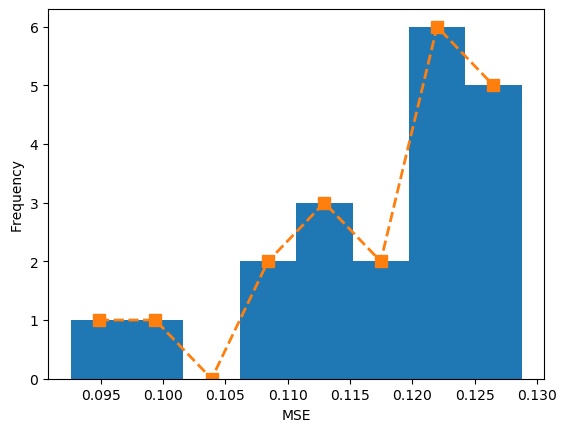

In [83]:
### with line

bean = 8

import scipy.stats as stats
df_sort = df_real.copy()
df_sort.sort_values('MSE', inplace = True)

data = df_sort['MSE']
y, binEdges =np.histogram(data,bins=bean)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

plt.hist(df_sort['MSE'],bins=bean)
plt.plot(bincenters,y,'--', lw = 2, marker='s', markersize='8',)
# plt.title('MSE Distribution 5 Descriptors')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.savefig('./msedist_25desc_neue.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()

# Histogram pIC50

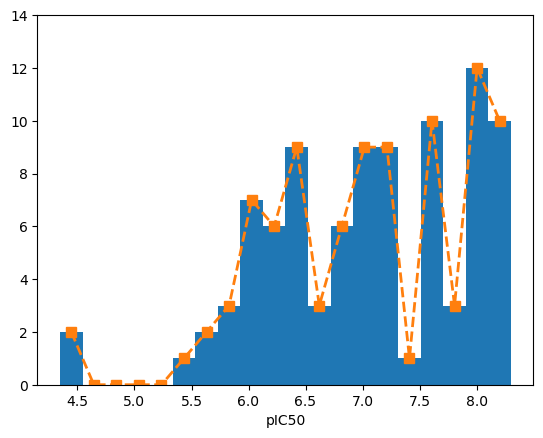

In [21]:
import scipy.stats as stats

df_target = pd.read_csv("data/pIC50_target.csv")
bean = 20
# df_sort = desc_5_raw.copy()
# df_sort.sort_values('MSE', inplace = True)

data = df_target['pIC50']
y, binEdges = np.histogram(data,bins=bean)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

plt.hist(df_target['pIC50'], bins=bean)
plt.plot(bincenters,y,'--', lw = 2, marker='s', markersize='7')
# plt.title('pIC50 Activity')
plt.xlabel('pIC50')
plt.ylim(0, 14) 
# plt.savefig('./pic50Activity20bin.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()

# RBF

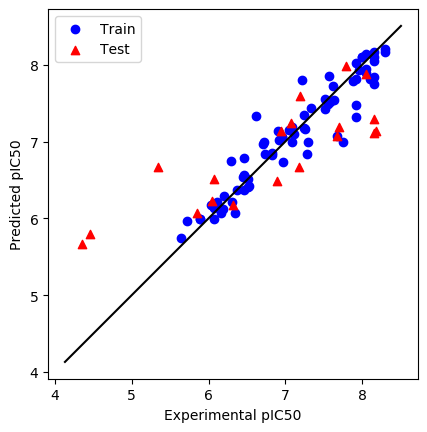

In [84]:
#########################
### Actual Vs Predict ###
#########################

param_grid={
            'C': 10,
            'gamma': 'scale',
            'epsilon':0.1
}
c = param_grid['C']
gam = param_grid['gamma']
eps = param_grid['epsilon']

model = SVR(kernel="rbf", C= c, gamma= gam, epsilon=eps)
model.fit(scale_x_train, y_train)
y_train_pred = model.predict(scale_x_train)
y_test_pred = model.predict(scale_x_test)

fig = plt.figure()
ax = plt.gca()
ax.scatter(y_train, y_train_pred, color="b" , label='Train')
ax.scatter(y_test, y_test_pred, color="r" , label='Test',marker='^')
ax.legend(loc='top left')
# ax.plot([0, 1], [0, 1], color="black",transform=ax.transAxes)
dl = np.linspace(*ax.get_xlim())
ax.plot(dl, dl, color="black")
ax.set_aspect('equal')

plt.xlabel('Experimental pIC50')
plt.ylabel('Predicted pIC50')
# plt.title('RBF Actual Vs Predict')
plt.savefig('./actpred_rbf_neue.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()

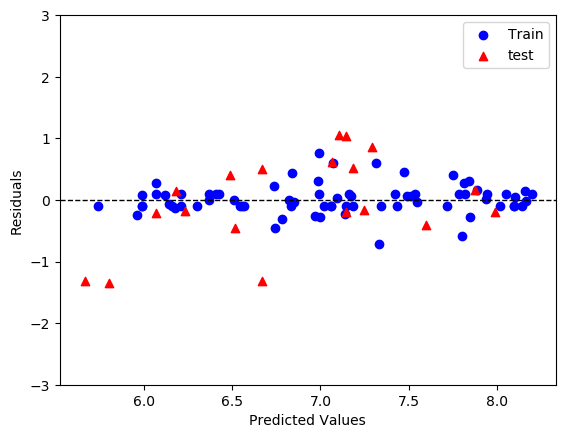

In [86]:
################
### Residual ###
################

param_grid={
            'C': 10,
            'gamma': 'scale',
            'epsilon':0.1
}
c = param_grid['C']
gam = param_grid['gamma']
eps = param_grid['epsilon']

model = SVR(kernel="rbf", C= c, gamma= gam, epsilon=eps)
model.fit(scale_x_train, y_train)
y_train_pred = model.predict(scale_x_train)
y_test_pred = model.predict(scale_x_test)


ytr = ytrain.iloc[:,0]
ytr.tolist()
yts = ytest.iloc[:,0]
yts.tolist()

train_res = ytr - y_train_pred
test_res = yts - y_test_pred

fig = plt.figure()
ax = plt.gca()
ax.scatter(y_train_pred, train_res, color="b" , label='Train' ,marker='o')
ax.scatter(y_test_pred, test_res, color="red" , label='test' ,marker='^')
ax.legend(loc='top right')
ax.axhline(linewidth= 1, color='black', linestyle='dashed')
# plt.title('Residual SVR RBF')
plt.ylim(-3,3)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.savefig('./res_rbf_neue.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()


# Linear

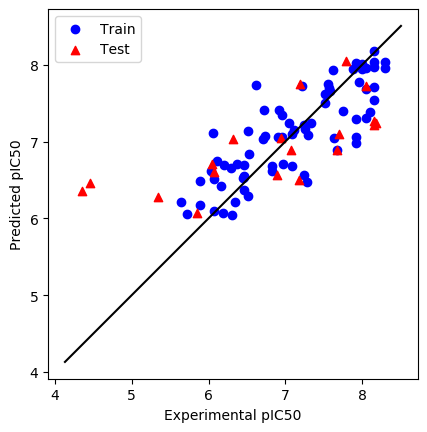

In [94]:
#########################
### Actual Vs Predict ###
#########################

param_grid={
            'C': 1,
            'degree': 1,
            'epsilon': 0.1
}

c = param_grid['C']
deg = param_grid['degree']
eps = param_grid['epsilon']

model_lin = SVR(kernel="linear", C= c, degree= deg, epsilon=eps)
model_lin.fit(scale_x_train, y_train)
y_train_pred = model_lin.predict(scale_x_train)
y_test_pred = model_lin.predict(scale_x_test)

ax = plt.gca()
ax.scatter(y_train, y_train_pred, color="b" , label='Train')
ax.scatter(y_test, y_test_pred, color="r" , label='Test', marker='^')
ax.legend(loc='top left')
# ax.plot([0, 1], [0, 1], color="black",transform=ax.transAxes)
dl = np.linspace(*ax.get_xlim())
ax.plot(dl, dl, color="black")
ax.set_aspect('equal')

# plt.title('Linear Actual Vs Predict')
plt.xlabel('Experimental pIC50')
plt.ylabel('Predicted pIC50')
plt.savefig('./actpred_linear_neue.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()

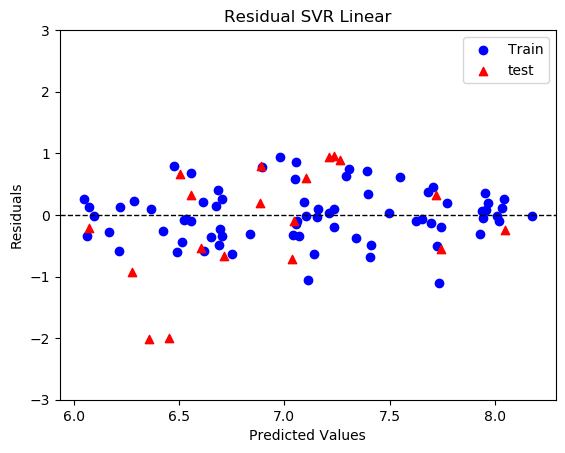

In [96]:
################
### Residual ###
################

param_grid={
            'C': 1,
            'degree': 1,
            'epsilon': 0.1
}

c = param_grid['C']
deg = param_grid['degree']
eps = param_grid['epsilon']

model_lin = SVR(kernel="linear", C= c, degree= deg, epsilon=eps)
model_lin.fit(scale_x_train, y_train)
y_train_pred = model_lin.predict(scale_x_train)
y_test_pred = model_lin.predict(scale_x_test)

ytr = ytrain.iloc[:,0]
ytr.tolist()
yts = ytest.iloc[:,0]
yts.tolist()

train_res = ytr - y_train_pred
test_res = yts - y_test_pred

fig = plt.figure()
ax = plt.gca()
ax.scatter(y_train_pred, train_res, color="b" , label='Train' ,marker='o')
ax.scatter(y_test_pred, test_res, color="red" , label='test' ,marker='^')
ax.legend(loc='top right')
ax.axhline(linewidth= 1, color='black', linestyle='dashed')
plt.title('Residual SVR Linear')
plt.ylim(-3,3)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.savefig('./res_linear_neue.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()


# Poly

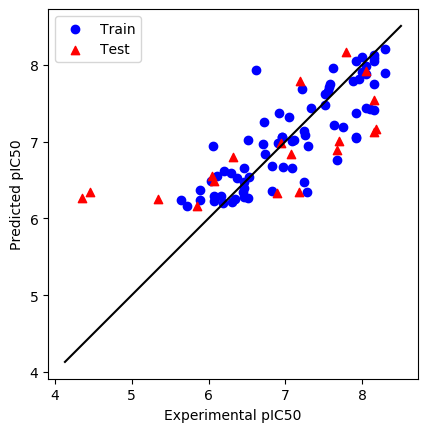

In [97]:
#########################
### Actual Vs Predict ###
#########################

param_grid={
            'C': 1,
            'degree': 2,
            'epsilon': 0.1
}

c = param_grid['C']
deg = param_grid['degree']
eps = param_grid['epsilon']

modelPol = SVR(kernel="poly", C= c, degree= deg, epsilon=eps)
modelPol.fit(scale_x_train, y_train)
y_train_pred = modelPol.predict(scale_x_train)
y_test_pred = modelPol.predict(scale_x_test)

ax = plt.gca()
ax.scatter(y_train, y_train_pred, color="b" , label='Train')
ax.scatter(y_test, y_test_pred, color="r" , label='Test' , marker='^')
ax.legend(loc='top left')
# ax.plot([0, 1], [0, 1], color="black",transform=ax.transAxes)
dl = np.linspace(*ax.get_xlim())
ax.plot(dl, dl, color="black")
ax.set_aspect('equal')

# plt.title('Poly Actual Vs Predict')
plt.xlabel('Experimental pIC50')
plt.ylabel('Predicted pIC50')
# plt.savefig('./actpred_poly_dl_squarerate.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()

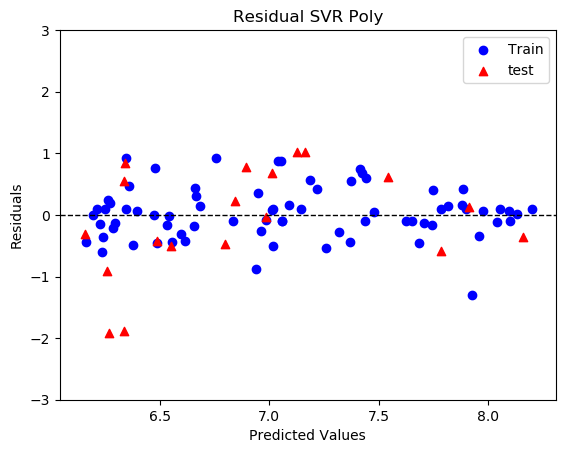

In [101]:
################
### Residual ###
################

param_grid={
            'C': 1,
            'degree': 2,
            'epsilon': 0.1
}

c = param_grid['C']
deg = param_grid['degree']
eps = param_grid['epsilon']

modelPol = SVR(kernel="poly", C= c, degree= deg, epsilon=eps)
modelPol.fit(scale_x_train, y_train)
y_train_pred = modelPol.predict(scale_x_train)
y_test_pred = modelPol.predict(scale_x_test)

ytr = ytrain.iloc[:,0]
ytr.tolist()
yts = ytest.iloc[:,0]
yts.tolist()

train_res = ytr - y_train_pred
test_res = yts - y_test_pred

fig = plt.figure()
ax = plt.gca()
ax.scatter(y_train_pred, train_res, color="b" , label='Train' ,marker='o')
ax.scatter(y_test_pred, test_res, color="red" , label='test' ,marker='^')
ax.legend(loc='top right')
ax.axhline(linewidth= 1, color='black', linestyle='dashed')
plt.title('Residual SVR Poly')
plt.ylim(-3,3)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# plt.savefig('./res_pred_poly.png', format='png', dpi=1000, bbox_inches="tight")    
plt.show()
